# Activity 3.1: Classifying fashion clothes using TensorFlow Dataset and TensorFlow 2. 

1. Import all required modules

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and Keras
import tensorflow as tf
import tensorflow_datasets as tfds

print("TensorFlow version: {}".format(tf.__version__))
print("TensorFlow datasets version: {}".format(tfds.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.1.0
TensorFlow datasets version: 2.1.0
Eager execution: True


2. Import the Fashion MNIST dataset using TensorFlow Datasets splitting it into train and test splits and create the list of classes 

In [2]:
# Construct a tf.data.Dataset
(train_images, train_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

train_images = np.squeeze(train_images)
test_images = np.squeeze(test_images)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

3. Explore the dataset to get familiar with input features shapes, labels, classes, their visual appearance and perform data normalization 

In [3]:
print("Training dataset shape =", train_images.shape)
print("Training labels length =", len(train_labels))
print("Some training labels =", train_labels[:5])
print("Test dataset shape =", test_images.shape)
print("Test labels length =", len(test_labels))

Training dataset shape = (60000, 28, 28)
Training labels length = 60000
Some training labels = [2 1 8 4 1]
Test dataset shape = (10000, 28, 28)
Test labels length = 10000


It is also useful to take a look at how images appear. The following code snippet shows the first training set instance

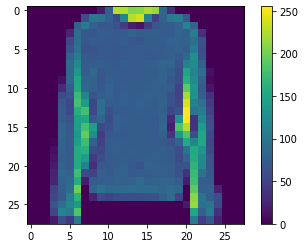

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Perform features normalization 

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Let’s now take a look at some instances of our training set, by plotting 25 of them with their correspondent label: 

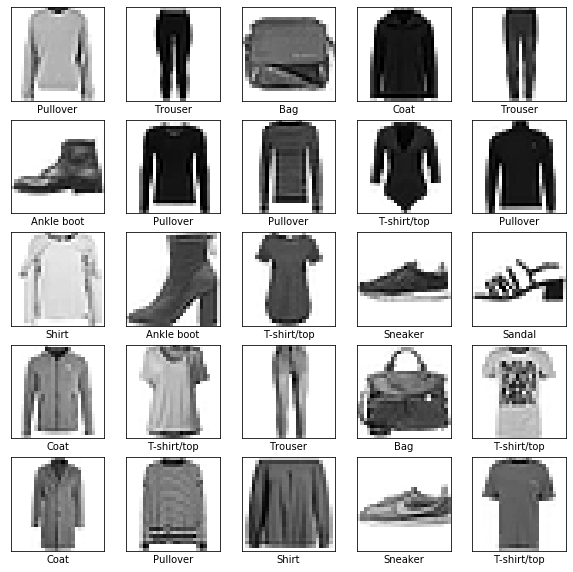

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

4. Build the classification model

First we create a model creating a layers sequence: 

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Then we associate to the model an optimizer, a loss function and a metric: 

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

5. Train the deep neural network

In [9]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4983 - accuracy: 0.8247
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3720 - accuracy: 0.8660
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3362 - accuracy: 0.8765
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3105 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2957 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2824 - accuracy: 0.8953
Epoch 7/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2689 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2591 - accuracy: 0.9028
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2467 - accuracy: 0.9076
Epoch 10/10
60

6. Test model accuracy. You should obtain accuracy above 88%. 

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_accuracy)

10000/10000 - 0s - loss: 0.3323 - accuracy: 0.8833

Test accuracy: 0.8833


7. Perform inference and check predictions against ground truth 

As a first step we add a softmax layer to the model, so that it outputs probabilities instead of logits, and print out the probabilities of the first 3 test instances with the following code: 

In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0:3])

[[6.3124833e-05 3.7941309e-08 1.5193115e-02 1.1776210e-06 9.4951856e-01
  8.0300183e-11 3.5207037e-02 6.5856633e-11 1.6912467e-05 3.1668197e-09]
 [2.6963394e-06 1.8346770e-11 7.9496141e-04 4.9445759e-07 9.4115227e-01
  7.5902576e-13 5.8049101e-02 1.0255192e-12 5.1244757e-07 1.3871319e-10]
 [1.4783152e-04 9.3791352e-10 1.2380703e-08 2.7902951e-08 6.2671126e-07
  3.1466357e-02 7.4100749e-06 3.9640579e-02 4.8897800e-06 9.2873228e-01]]


Next we compare one model prediction (i.e. the class with the highest predicted probability), the one on the first test instance, with its ground truth

In [12]:
print("Class ID, predicted | real =", np.argmax(predictions[0]), "|", test_labels[0])

Class ID, predicted | real = 4 | 4


In order to perform a comparison even more clear, we create the following two functions. The first one plots the i-th test set instance image with a caption showing the predicted class with the highest probability, its probability in percentage, and the ground truth between round brackets. This caption will be blue for correct predictions, and red for wrong ones. 

In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                  100*np.max(predictions_array),
                                  classes[true_label]),
                                  color=color)

The second function creates a second image showing a bar plot of all classes predicted probabilities. Coloring the highest probable one in blue if the prediction is correct, or in red if it is incorrect. In this second case the bar corresponding to the correct label is colored in blue. 

In [ ]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Using these two functions we can examine every instance of the test set. In the following snippet we plot the first test instance.

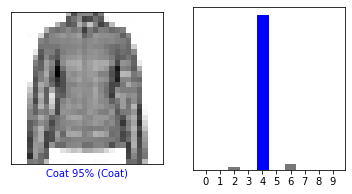

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

The very same approach can be used to plot a user defined numer of test instances, arranging the output in sub plots as follows: 

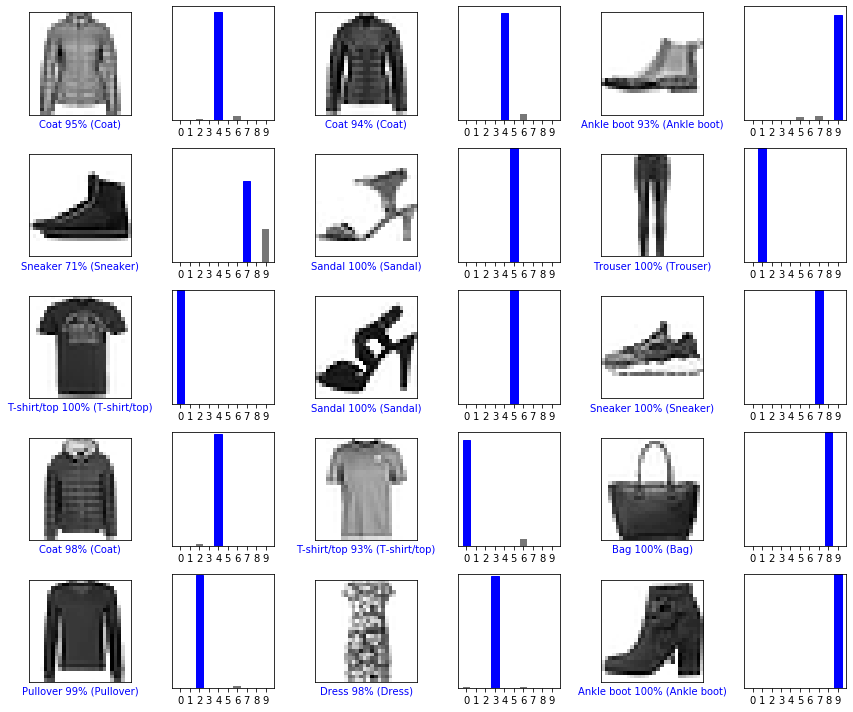

In [14]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()